In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Demonstration of Loading and Exploring Data

The `definitions` module loads all of the data into a dictionary-of-dictionaries called `data`. This takes a minute to do, as it does a little more than just load the datasets. It additionally pre-calculates derived fields from each of the data sets, does field renaming for consistency with the data sets, and computes and stores a SFMS (the longest bit) if possible, for all datasets.

NOTE: This may output some numpy error messages. You can ignore these.

In [2]:
from quenched_galaxies.definitions import data

/home/aemerick/code/quenched_galaxies/definitions.py:254: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_20Myr']   = _np.log10(data['SCSAM']['sfr_ave20M'])
/home/aemerick/code/quenched_galaxies/definitions.py:255: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_100Myr']  = _np.log10(data['SCSAM']['sfr_ave100M'])
/home/aemerick/code/quenched_galaxies/definitions.py:256: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_SFR_1Gyr']    = _np.log10(data['SCSAM']['sfr_ave1G'])
/home/aemerick/code/quenched_galaxies/definitions.py:268: RuntimeWarning: divide by zero encountered in log10
  data['SCSAM']['log_' + k] = _np.log10(data['SCSAM'][k])
/home/aemerick/code/quenched_galaxies/definitions.py:303: RuntimeWarning: divide by zero encountered in log10
  data['Brooks']['log_' + k] = _np.log10(data['Brooks'][k])
/home/aemerick/code/quenched_galaxies/definitions.py:312: RuntimeWarning: divide by zero encountered in 

CAUTION: HI Approximation on - For data with no explicit HI mass, HI mass is taken as the cold gas mass times the constant factor  0.735


In [3]:
# lets see whats in here:
for k in data.keys():
    # print name and size of each data set (all datasets have log_Mstar)
    print "%20s %8i"%(k,np.size(data[k]['log_Mstar']))

               EAGLE    16710
          MUFASA_ari     4402
              MUFASA     4281
        Bradford2015     1715
               SCSAM    18736
              Brooks       28
         NSA_catalog    14998
               xGASS      520
           Illustris    47915


Then to access the data for a given dataset it is quite easy. Lets say we wanted to make a very simple scatter plot of the stellar mass vs. M_HI for the EAGLE data set.

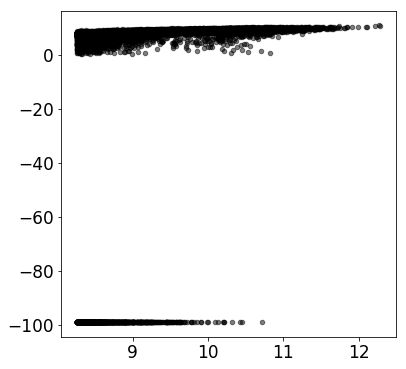

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

ax.scatter( data['EAGLE']['log_Mstar'], data['EAGLE']['log_MHI'], color = 'black', s = 20, alpha = 0.5)

Obviously that looks very gross, and clearly there is something weird at the low end. This brings up a good point of the data sets. For logged values where the quantity is in fact zero, (i.e. no gas, as seen in the above) the logged value is set to -99 as a flag. This is done for all datasets. 

Lets do this better

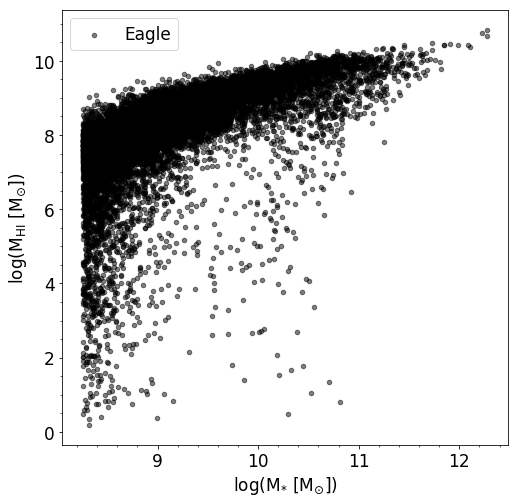

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

select = data['EAGLE']['log_MHI'] > -99

ax.scatter( data['EAGLE']['log_Mstar'][select], data['EAGLE']['log_MHI'][select], 
            color = 'black', s = 20, alpha = 0.5, label = "Eagle")

# some style improvements
ax.set_xlabel(r'log(M$_{*}$ [M$_{\odot}$])')
ax.set_ylabel(r'log(M$_{\rm HI}$ [M$_{\odot}$])')
ax.legend(loc='upper left')
plt.minorticks_on()

# But scatter plots are gross....

For large data sets like this, scatter plots are gross. Generally a 2D histogram looks much nicer, and is relatively easily to put together with numpy / matplotlib tools. Also useful is plotting running medians of the distribution, with some shading to show either the standard deviation or the inner quartile range of the distribution (I prefer IQR). This is a little bit less straightforward to do in a way that looks nice, particularly when bins may or may not contain enough data to compute statistics.

I've made a helper function to do exactly this. Demonstrated below.

In [6]:
from quenched_galaxies.tools import bin_and_plot

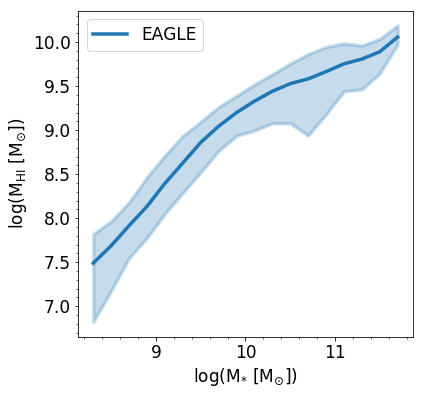

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

xdata = data['EAGLE']['log_Mstar']
ydata = data['EAGLE']['log_MHI']
xbins = np.arange(-8, 12, 0.2)

# This will plot the median of the data, binned according to bins,
# with shading of the inner quartile range. Use "None" in include range
# to just plot the median. Bins with < nthresh points will show points instead of
# line and shading
#
bin_and_plot(ax, xdata, ydata, xbins, label = 'EAGLE', remove_zero = True,
             include_range = 'IQR', n_thresh = 10, color = 'C0')
ax.set_xlabel(r'log(M$_{*}$ [M$_{\odot}$])')
ax.set_ylabel(r'log(M$_{\rm HI}$ [M$_{\odot}$])')
ax.legend(loc='upper left')
plt.minorticks_on()

Now lets do this for multiple data sets

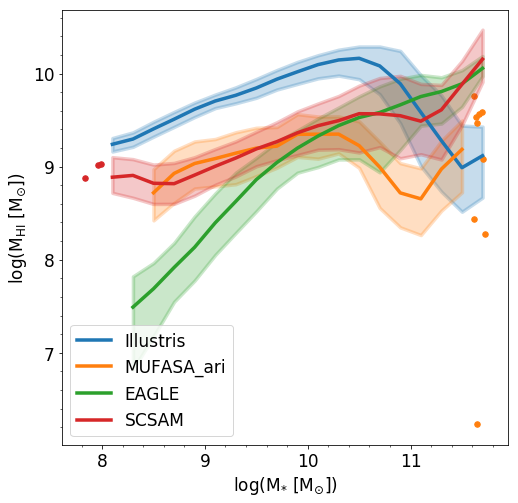

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

colors = ['C0','C1','C2','C3']
for i,name in enumerate(['Illustris','MUFASA_ari','EAGLE','SCSAM']):
    
    xdata = data[name]['log_Mstar']
    ydata = data[name]['log_MHI']
    xbins = np.arange(-8, 12, 0.2)
    bin_and_plot(ax, xdata, ydata, xbins, label = name, remove_zero = True,
                 include_range = 'IQR', n_thresh = 10, color = colors[i])

    
    
ax.set_xlabel(r'log(M$_{*}$ [M$_{\odot}$])')
ax.set_ylabel(r'log(M$_{\rm HI}$ [M$_{\odot}$])')
ax.legend(loc='lower left')
plt.minorticks_on()